## 데이터 전처리

https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
movies = pd.read_csv('movies_metadata.csv')
movies.head(3)

C:\Users\kathe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
movies = movies[['imdb_id', 'original_title', 'original_language', 'overview', 'runtime', 'vote_average', 'production_companies']]

In [5]:
movies.head()

,imdb_id,original_title,original_language,overview,runtime,vote_average,production_companies
0,tt0114709,Toy Story,en,"Led by Woody, Andy's toys live happily in his ...",81.0,7.7,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,tt0113497,Jumanji,en,When siblings Judy and Peter discover an encha...,104.0,6.9,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,tt0113228,Grumpier Old Men,en,A family wedding reignites the ancient feud be...,101.0,6.5,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,tt0114885,Waiting to Exhale,en,"Cheated on, mistreated and stepped on, the wom...",127.0,6.1,[{'name': 'Twentieth Century Fox Film Corporat...
4,tt0113041,Father of the Bride Part II,en,Just when George Banks has recovered from his ...,106.0,5.7,"[{'name': 'Sandollar Productions', 'id': 5842}..."


In [6]:
movies.describe()

,runtime,vote_average
count,45203.000000,45460.000000
mean,94.128199,5.618207
std,38.407810,1.924216
min,0.000000,0.000000
25%,85.000000,5.000000
50%,95.000000,6.000000
75%,107.000000,6.800000
max,1256.000000,10.000000


In [7]:
movies.isna().sum()

imdb_id                  17
original_title            0
original_language        11
overview                954
runtime                 263
vote_average              6
production_companies      3
dtype: int64

In [8]:
movies = movies.dropna()

Text(0, 0.5, 'Ratings')

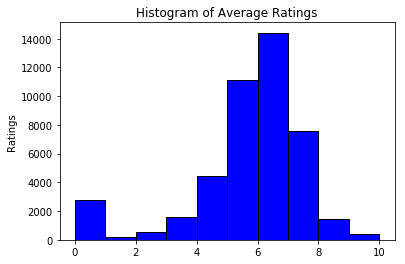

In [9]:
# matplotlib histogram
plt.hist(movies['vote_average'], color = 'blue', edgecolor = 'black')

# Add labels
plt.title('Histogram of Average Ratings')
plt.ylabel('Ratings')

Text(0, 0.5, 'Runtime (min)')

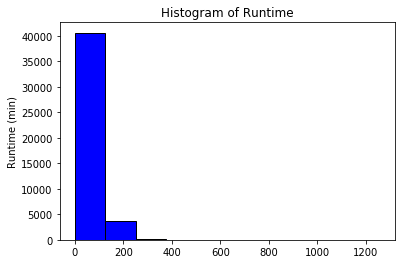

In [10]:
# matplotlib histogram
plt.hist(movies['runtime'], color = 'blue', edgecolor = 'black')

# Add labels
plt.title('Histogram of Runtime')
plt.ylabel('Runtime (min)')

In [11]:
movies[movies.runtime == movies.runtime.max()]

,imdb_id,original_title,original_language,overview,runtime,vote_average,production_companies
24178,tt0076993,Centennial,en,The economic and cultural growth of Colorado s...,1256.0,7.9,"[{'name': 'Universal Television', 'id': 26727}]"


In [12]:
# remove outliers (+- 3 stdv from mean)
movies_df = movies[np.abs(movies.runtime-movies.runtime.mean()) <= (3*movies.runtime.std())]

In [13]:
movies_df = movies_df.reset_index(drop = True)

In [14]:
movies_df.describe()

,runtime,vote_average
count,44172.000000,44172.000000
mean,93.381305,5.633664
std,29.448439,1.891831
min,0.000000,0.000000
25%,85.000000,5.000000
50%,95.000000,6.000000
75%,106.000000,6.800000
max,207.000000,10.000000


Text(0, 0.5, 'Ratings')

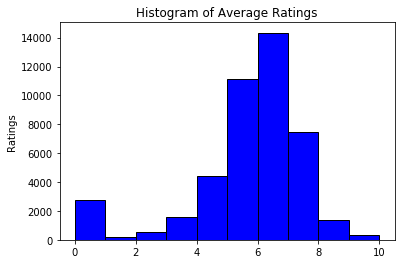

In [15]:
# matplotlib histogram
plt.hist(movies_df['vote_average'], color = 'blue', edgecolor = 'black')

# Add labels
plt.title('Histogram of Average Ratings')
plt.ylabel('Ratings')

Text(0, 0.5, 'Runtime (min)')

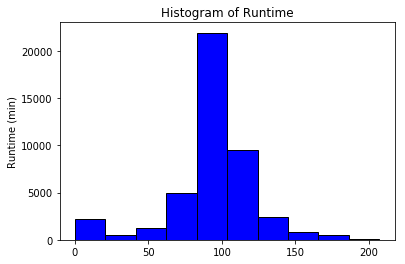

In [16]:
# matplotlib histogram
plt.hist(movies_df['runtime'], color = 'blue', edgecolor = 'black')

# Add labels
plt.title('Histogram of Runtime')
plt.ylabel('Runtime (min)')

## 텍스트 데이터 분석

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

In [18]:
corpus = movies_df.overview.tolist() # pd series to list

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.0005) # setting min_df (memory issue)

In [20]:
tfidf = vectorizer.fit_transform(corpus).todense()

In [21]:
tfidf_df = pd.DataFrame(tfidf)

In [22]:
# ex to see if the model works
print("Similarity between", movies_df.original_title[0], "and", movies_df.original_title[1], " : ", cosine_similarity(tfidf[0], tfidf[1]))

Similarity between Toy Story and Jumanji  :  [[0.01893468]]


## 영화 추천

In [23]:
# # random.seed(0)
# rand_mov_idx = random.randint(0, len(movies_df) - 1) # 0 to (number of movies - 1) --- inclusive

# rand_mov_title = movies_df.original_title[rand_mov_idx]

# print("Randomly chosen movie :", rand_mov_title)

In [24]:
dct = {}
for i in range (1, len(tfidf)):
    title = movies_df.original_title[i]
    dct[title] = cosine_similarity(tfidf[0], tfidf[i])

In [25]:
sorted(dct.items(), key = lambda x: x[1], reverse = True)[:5]

[('Toy Story 3', array([[0.50568711]])),
 ('Toy Story 2', array([[0.44204639]])),
 ('The 40 Year Old Virgin', array([[0.37867561]])),
 ('The Champ', array([[0.34972492]])),
 ('Superstar: The Life and Times of Andy Warhol', array([[0.3371542]]))]